Model features: ['Recipientgender' 'Stemcellsource' 'Donorage' 'Donorage35' 'IIIV'
 'Gendermatch' 'DonorABO' 'RecipientABO' 'RecipientRh' 'ABOmatch'
 'CMVstatus' 'DonorCMV' 'RecipientCMV' 'Disease' 'Riskgroup'
 'Txpostrelapse' 'Diseasegroup' 'HLAmatch' 'HLAmismatch' 'Antigen' 'Alel'
 'HLAgrI' 'Recipientage' 'Recipientage10' 'Recipientageint' 'Relapse'
 'aGvHDIIIIV' 'extcGvHD' 'CD34kgx10d6' 'CD3dCD34' 'CD3dkgx10d8'
 'Rbodymass' 'ANCrecovery' 'PLTrecovery' 'time_to_aGvHD_III_IV'
 'survival_time']

Available features in DataFrame: ['Recipientgender', 'Stemcellsource', 'Donorage', 'Donorage35', 'IIIV', 'Gendermatch', 'DonorABO', 'RecipientABO', 'RecipientRh', 'ABOmatch', 'CMVstatus', 'DonorCMV', 'RecipientCMV', 'Disease', 'Riskgroup', 'Txpostrelapse', 'Diseasegroup', 'HLAmatch', 'HLAmismatch', 'Antigen', 'Alel', 'HLAgrI', 'Recipientage', 'Recipientage10', 'Recipientageint', 'Relapse', 'aGvHDIIIIV', 'extcGvHD', 'CD34kgx10d6', 'CD3dCD34', 'CD3dkgx10d8', 'Rbodymass', 'ANCrecovery', 'PLTrecove

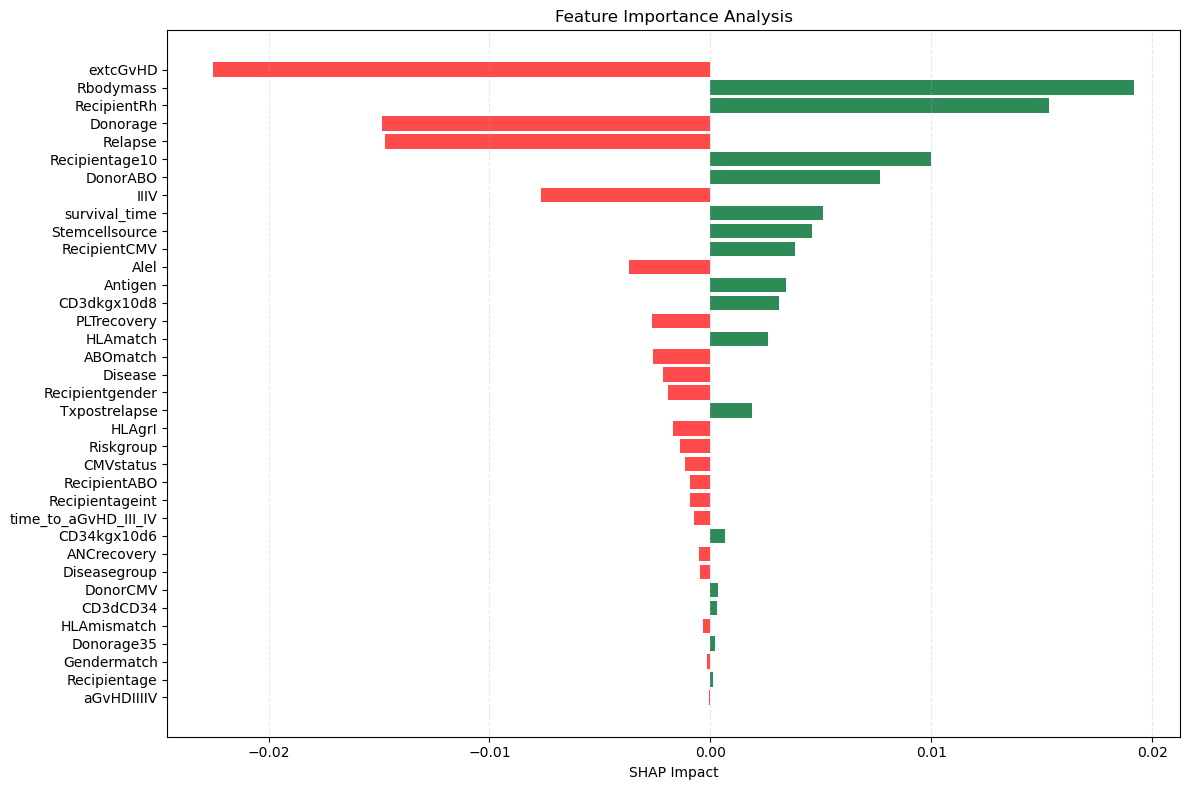

In [5]:
# Import required libraries
import sys
import os
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import shap

# Load the model and explainer
model = joblib.load('../models/rf_model_compressed.joblib')
explainer = joblib.load('../models/shap_explainer_new.joblib')

# Print model features
print("Model features:", model.feature_names_in_)

# Create sample input data with all required features
sample_data = {
    'Recipientgender': 1,
    'Stemcellsource': 0,
    'Donorage': 30,
    'Donorage35': 0,
    'IIIV': 0,
    'Gendermatch': 1,
    'DonorABO': 0,
    'RecipientABO': 0,
    'RecipientRh': 1,
    'ABOmatch': 1,
    'CMVstatus': 0,
    'DonorCMV': 0,
    'RecipientCMV': 0,
    'Disease': 0,
    'Riskgroup': 0,
    'Txpostrelapse': 0,
    'Diseasegroup': 0,
    'HLAmatch': 5,
    'HLAmismatch': 5,
    'Antigen': 0,
    'Alel': 5,
    'HLAgrI': 0,
    'Recipientage': 10,
    'Recipientage10': 1,
    'Recipientageint': 1,
    'Relapse': 0,
    'aGvHDIIIIV': 0,
    'extcGvHD': 0,
    'CD34kgx10d6': 0,
    'CD3dCD34': 0,
    'CD3dkgx10d8': 0,
    'Rbodymass': 20,
    'ANCrecovery': 0,
    'PLTrecovery': 0,
    'time_to_aGvHD_III_IV': 0,
    'survival_time': 0  # Added missing feature
}

# Convert to DataFrame
df = pd.DataFrame([sample_data])

# Print available features before filtering
print("\nAvailable features in DataFrame:", df.columns.tolist())

# Ensure correct feature order
df = df[model.feature_names_in_]
print("\nData prepared with correct features!")

# Calculate SHAP values
shap_values = explainer.shap_values(df, check_additivity=False)
print("\nSHAP values calculated!")
print(f"Type of SHAP values: {type(shap_values)}")
if isinstance(shap_values, list):
    print(f"Number of classes: {len(shap_values)}")
    shap_values = shap_values[1]  # Use SHAP values for the positive class
else:
    print(f"Shape of SHAP values: {shap_values.shape}")

# Create visualization
plt.figure(figsize=(12, 8))

# Get importance values
if shap_values.ndim == 3:
    importance_values = shap_values[0][:, 1]  # Use SHAP values for the positive class
else:
    importance_values = shap_values[0] if shap_values.ndim > 1 else shap_values

feature_names = df.columns

# Sort by absolute importance
sorted_idx = np.argsort(np.abs(importance_values))
feature_names = np.array(feature_names)[sorted_idx]
importance_values = importance_values[sorted_idx]

# Create bar plot
y_pos = np.arange(len(feature_names))
colors = ['#ff4b4b' if v < 0 else '#2e8b57' for v in importance_values]
plt.barh(y_pos, importance_values, color=colors)

# Customize plot
plt.yticks(y_pos, feature_names)
plt.xlabel('SHAP Impact')
plt.title('Feature Importance Analysis')
plt.grid(True, axis='x', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()